In [99]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats

In [100]:
data = pd.read_csv('trainingpts_cleaned.csv', index_col = 0)

data.head()

,mod_B0_0,mod_B0_1,mod_B0_2,mod_B0_3,mod_B0_4,mod_B0_5,mod_B0_6,mod_B0_7,mod_B0_8,mod_B0_9,...,EVI_at_min2_missing,EVI_at_infl2_missing,quarterPeriod_first_missing,EVI_at_peak2_missing,fittedAmplitude_second_missing,quarterPeriod_second_missing,peakDiff_missing,peakDay_first_missing,EVI_at_infl1_missing,maxEVI_second_missing
0,0.200212,0.214260,0.095794,0.237088,0.246048,0.336598,0.310465,0.270645,0.188515,0.204236,...,False,False,False,False,False,False,False,False,False,False
1,0.444825,0.378180,0.418023,0.367307,0.417435,0.362797,0.405056,0.367728,0.337898,0.318900,...,False,False,False,False,False,False,False,False,False,False
2,0.391427,0.342404,0.330443,0.335222,0.358131,0.323579,0.279447,0.416388,0.401079,0.314834,...,True,True,False,True,True,False,True,False,False,False
3,0.221930,0.175103,0.170139,0.203599,0.170929,0.260337,0.205148,0.260194,0.245417,0.328592,...,False,False,False,False,False,False,False,False,False,False
4,0.400937,0.367652,0.279104,0.299323,0.280226,0.304503,0.175922,0.198228,0.220535,0.371426,...,False,False,False,False,False,False,False,False,False,False


In [101]:
# turn class column into categorical
data['class_num'] = data['class'].astype('int')
data['class'] = data['class'].astype('category')

# define columns into timeseries and phenological categories, but add in the class column
mod_ts_cols = [colname for colname in data if colname.startswith('mod')]
non_ts_cols = list(set(data.columns) - set(mod_ts_cols))
phenospectral_cols = ['EVI_at_infl2', 'quarterPeriod_first','EVI_at_min1','quarterPeriod_second','fittedAmplitude_second',
                     'EVI_at_infl1','peakDay_first','EVI_at_peak2','peakDiff', 'maxEVI_first','EVI_at_min2',
                     'peakDay_second', 'maxEVI_second', 'EVI_at_peak1', 'fittedAmplitude_first',]

# set reasonable limits for each phenological parameter
reasonable_limits = {'peakDay_second': [60, 365], 'fittedAmplitude_first': [0, 2],
                    'EVI_at_peak1': [0.1, 3], 'EVI_at_min1': [0, 0.5],
                    'maxEVI_first': [0.1, 3], 'EVI_at_min2': [0, 0.5],
                    'EVI_at_infl2': [0.1, 3], 'quarterPeriod_first': [10, 50],
                    'EVI_at_peak2': [0.1, 3], 'fittedAmplitude_second': [0, 2], 
                    'quarterPeriod_second': [10, 50], 'peakDiff': [0, 300],
                    'peakDay_first': [0, 200], 'EVI_at_infl1': [0.1, 3],
                    'maxEVI_second': [0.1, 3]}

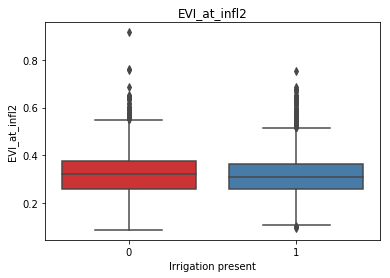

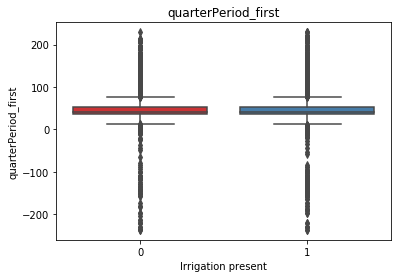

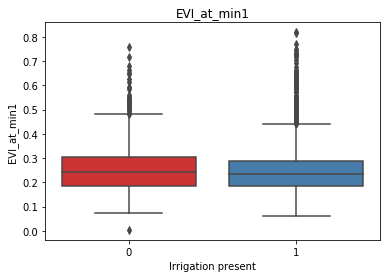

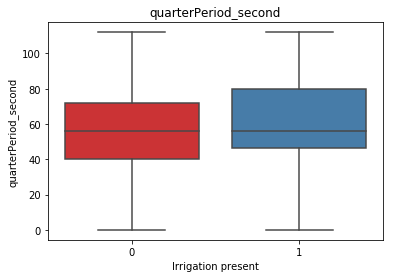

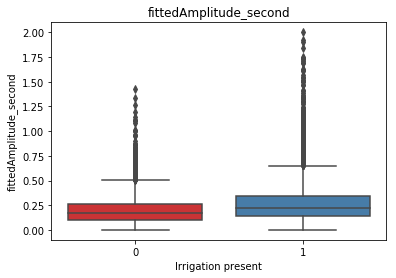

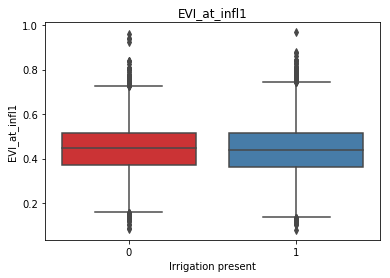

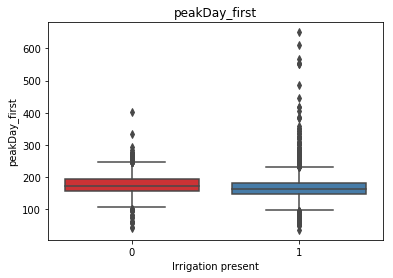

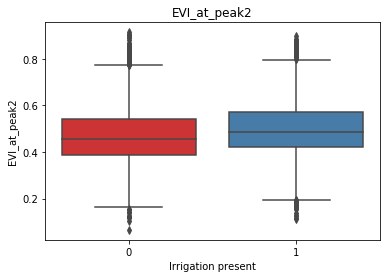

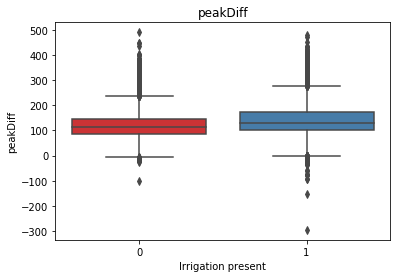

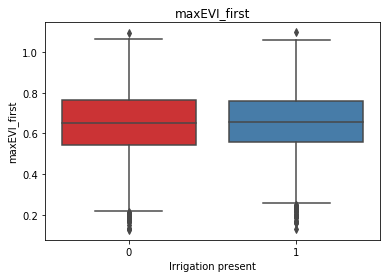

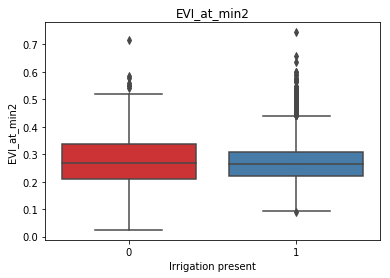

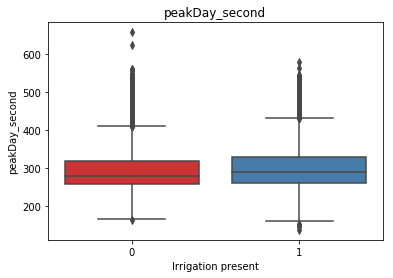

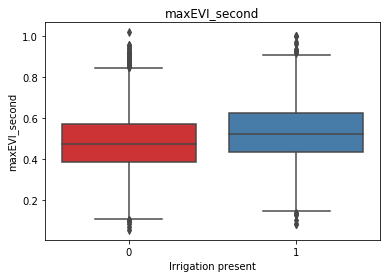

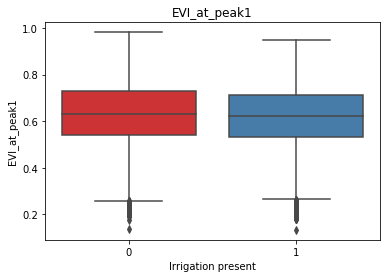

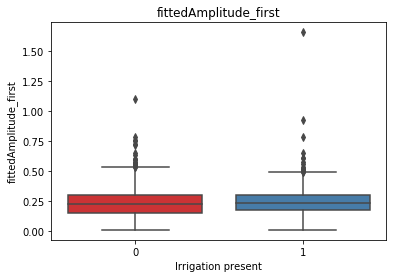

In [102]:
# do phenological parameters differ for irrigated vs nonirrigated points?

for colname in phenospectral_cols:
    sns.boxplot(x = 'class', y = colname, data = data, palette = 'Set1')
    plt.title(colname)
    plt.xlabel('Irrigation present')
    plt.ylabel(colname)
    lower_limit = reasonable_limits[colname][0]
    upper_limit = reasonable_limits[colname][1]
    #plt.axhline(lower_limit, color = 'red')
    #plt.axhline(upper_limit, color = 'red')
    plt.show()
    


In [103]:
# do phenological parameters differ for irrigated vs nonirrigated points? (statistical analysis)

# initialize dataframe to store statistical test results
t_test_results = pd.DataFrame(columns=['feature', 'region', 't_stat', 'p_value'])

for colname in phenospectral_cols:
    irrigated = data[data['class'] == 1][colname]
    nonirrigated = data[data['class'] == 0][colname]
    t_stat, p_value = stats.ttest_ind(irrigated, nonirrigated, nan_policy = 'omit', equal_var = False)
    
    t_test_results = t_test_results.append({'feature': colname, 'region': 'Brazil', 
                                            't_stat': t_stat, 'p_value': p_value}, ignore_index = True)

print(t_test_results)

                   feature  region     t_stat        p_value
0             EVI_at_infl2  Brazil  -2.953439   3.148796e-03
1      quarterPeriod_first  Brazil   3.150276   1.635599e-03
2              EVI_at_min1  Brazil  -0.878611   3.796302e-01
3     quarterPeriod_second  Brazil   8.645065   6.078808e-18
4   fittedAmplitude_second  Brazil  23.338571  1.896268e-117
5             EVI_at_infl1  Brazil  -0.729718   4.655770e-01
6            peakDay_first  Brazil -16.466785   3.200544e-60
7             EVI_at_peak2  Brazil  13.380565   1.559807e-40
8                 peakDiff  Brazil  16.036257   2.933265e-57
9             maxEVI_first  Brazil   2.540953   1.106794e-02
10             EVI_at_min2  Brazil  -2.996019   2.741355e-03
11          peakDay_second  Brazil  10.031754   1.378275e-23
12           maxEVI_second  Brazil  18.415258   1.104257e-74
13            EVI_at_peak1  Brazil  -3.379251   7.292094e-04
14   fittedAmplitude_first  Brazil   3.108334   1.886044e-03


Some phenological parameters appear to differentiate irrigation vs nonirrigation: fittedAmplitude_first, fittedAmplitude_second, peakDay_first, peakDay_second (only when out of reasonable bounds), EVI_at_peak2, peakDiff, maxEVI_second. These tend to capture the height of the peak, which tends to be higher for irrigated points, and the timing of the peaks. However, even these don't separate the two classes well. We can introduce more features that capture the peak: max EVI during the entire year, the date of the max EVI during the entire year, and the maxEVI - minEVI.

Other phenological parameters don't differentiate irrigation vs nonirrigation:  EVI_at_min1, EVI_at_min2, EVI_at_infl1,  EVI_at_infl2, quarterPeriod_second, maxEVI_first, EVI_at_peak1. These tend to correspond to EVI values at off-peak times. We can conclude that the most effective phenological parameters to separate irrigation from nonirrigation will target the height and timing of the peak, not the cycle length or EVI values at off-peak times.

In [104]:
# calculate new phenological features based on the peak

# the order of the mod_ts_cols needs to be shuffled into chronological order before they can be interpolated
# first, create a list of integers representing the order to sort by
sort_order = [int(colname.split('_')[2]) for colname in mod_ts_cols]

# sort the names of the timeseries columns
sorted_mod_ts_cols = [x for _,x in sorted(zip(sort_order, mod_ts_cols))]
first_half_mod_ts_cols = sorted_mod_ts_cols[0:40] # get only first half of the year
second_half_mod_ts_cols = sorted_mod_ts_cols[41:92] # get only second half of the year

def calc_max_EVI(row, colnames):
    ts_data = row[colnames]
    maxEVI = ts_data.max()
    return maxEVI

def calc_max_min_EVI(row, colnames):
    ts_data = row[colnames]
    maxEVI = ts_data.max()
    minEVI = ts_data.min()
    max_min_EVI = maxEVI - minEVI
    return max_min_EVI

def calc_date_maxEVI(row, colnames):
    ts_data = row[colnames]
    idx_maxEVI = np.argmax(ts_data)[0]
    colname_maxEVI = mod_ts_cols[idx_maxEVI]
    date_maxEVI = int(colname_maxEVI.split('_')[2])
    return date_maxEVI

data['max_EVI_firstHalf'] = data.apply(calc_max_EVI, axis = 1, colnames = first_half_mod_ts_cols)
data['max_min_EVI_firstHalf'] = data.apply(calc_max_min_EVI, axis = 1, colnames = first_half_mod_ts_cols)
data['date_maxEVI_firstHalf'] = data.apply(calc_date_maxEVI, axis = 1, colnames = first_half_mod_ts_cols)
data['max_EVI_secondHalf'] = data.apply(calc_max_EVI, axis = 1, colnames = second_half_mod_ts_cols)
data['max_min_EVI_secondHalf'] = data.apply(calc_max_min_EVI, axis = 1, colnames = second_half_mod_ts_cols)
data['date_maxEVI_secondHalf'] = data.apply(calc_date_maxEVI, axis = 1, colnames = second_half_mod_ts_cols)

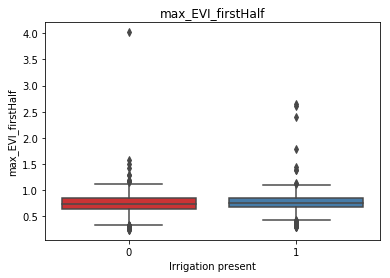

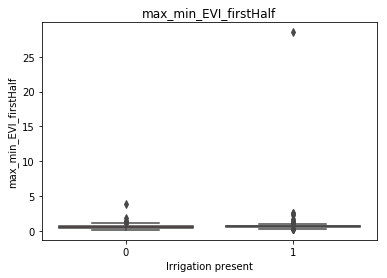

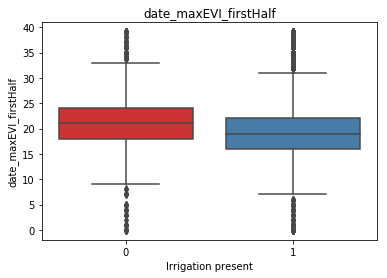

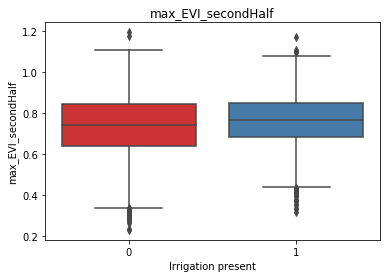

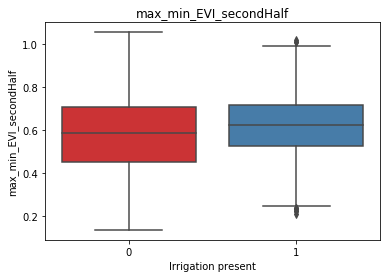

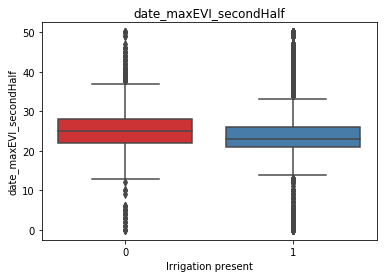

In [105]:
# check if these new phenological parameters can better separate irrigation from non-irrigation

new_phenospectral_cols = ['max_EVI_firstHalf', 'max_min_EVI_firstHalf', 'date_maxEVI_firstHalf',
                         'max_EVI_secondHalf', 'max_min_EVI_secondHalf', 'date_maxEVI_secondHalf']

for colname in new_phenospectral_cols:
    sns.boxplot(x = 'class', y = colname, data = data, palette = 'Set1')
    plt.title(colname)
    plt.xlabel('Irrigation present')
    plt.ylabel(colname)
    plt.show()

In [106]:
for colname in new_phenospectral_cols:
    irrigated = data[data['class'] == 1][colname]
    nonirrigated = data[data['class'] == 0][colname]
    t_stat, p_value = stats.ttest_ind(irrigated, nonirrigated, nan_policy = 'omit', equal_var = False)
    
    t_test_results = t_test_results.append({'feature': colname, 'region': 'Brazil', 
                                            't_stat': t_stat, 'p_value': p_value}, ignore_index = True)

The date of maxEVI in both the first and second halves of the year best separate irrigated from nonirrigated points. There's very little difference in the value of maxEVI or the maxEVI - minEVI value. Overall, these new peak-related predictors don't seem to be able to separate irrigated from nonirrigated points better than the original ones.

In [107]:
# is the missingness of phenological parameters related to whether the point is irrigated or not?

# get missing indicator column names
missingness_cols = [colname for colname in data if 'missing' in colname]

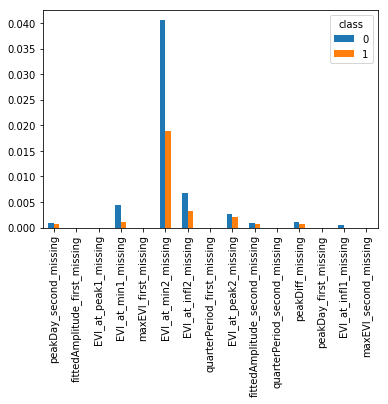

In [108]:
grouped_mean = data.groupby('class').mean()
grouped_std = data.groupby('class').std()

grouped_mean[missingness_cols].transpose().plot(kind = 'bar')

There are slightly more missing phenological values when there is no irrigation, so missingness may be an important predictor. Columns with no missing data should be eliminated before training.

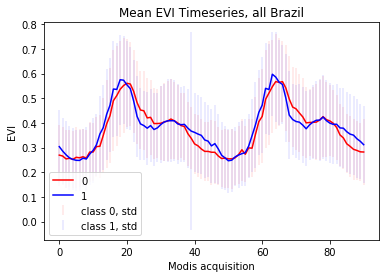

In [109]:
ts_mean = grouped_mean[sorted_mod_ts_cols].transpose()
ts_std = grouped_std[sorted_mod_ts_cols].transpose()
ts_mean.index = list(range(0, 91))
ts_std.index = list(range(0, 91))
ts_mean.index.name = 'modis_acquisition'
ts_std.index.name = 'modis_acquisition'
ts_mean.columns = ['0', '1']
ts_std.columns = ['0', '1']

plt.plot(ts_mean.index, ts_mean['0'], label = '0', color = 'red')
plt.plot(ts_mean.index, ts_mean['1'], label = '1', color = 'blue')
plt.errorbar(ts_mean.index, ts_mean['0'], ts_std['0'], linestyle = 'None', alpha = 0.1, color = 'red', label = 'class 0, std')
plt.errorbar(ts_mean.index, ts_mean['1'], ts_std['1'], linestyle = 'None', alpha = 0.1, color = 'blue', label = 'class 1, std')
plt.legend()
plt.title('Mean EVI Timeseries, all Brazil')
plt.ylabel('EVI')
plt.xlabel('Modis acquisition')
plt.show()

In [110]:
for colname in sorted_mod_ts_cols:
    irrigated = data[data['class'] == 1][colname]
    nonirrigated = data[data['class'] == 0][colname]
    t_stat, p_value = stats.ttest_ind(irrigated, nonirrigated, nan_policy = 'omit', equal_var = False)
    
    t_test_results = t_test_results.append({'feature': colname, 'region': 'Brazil', 
                                            't_stat': t_stat, 'p_value': p_value}, ignore_index = True)

There is a slight difference in the EVI timeseries between irrigated and nonirrigated points. Irrigated points peak earlier and higher, and dip sooner for each peak. There appears to be a strange set of EVI measurements around modis acquisition 39. This timeseries indicates that certain acquisition times, corresponding to the peak and falling limb of each peak, are better able to distinguish between the two classes. Not all acquisition times are equally useful.

In [111]:
# look at regional effect.
grouped_region = data.groupby(['region', 'class'])

regions = data['region'].unique()

grouped_ts_mean = grouped_region[sorted_mod_ts_cols].mean().transpose()
grouped_ts_std = grouped_region[sorted_mod_ts_cols].std().transpose()
grouped_ts_count = grouped_region[sorted_mod_ts_cols].count().transpose()

grouped_ts_mean.index = list(range(0, 91))
grouped_ts_std.index = list(range(0, 91))


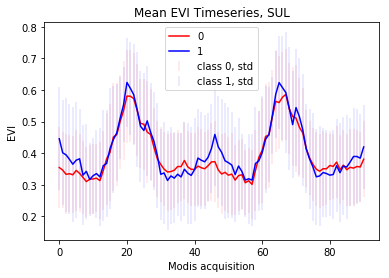

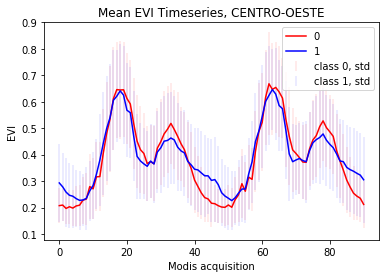

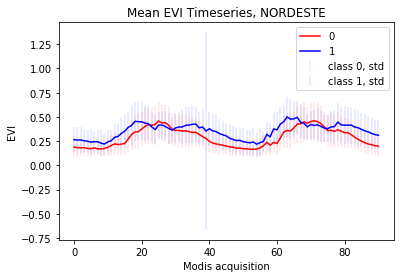

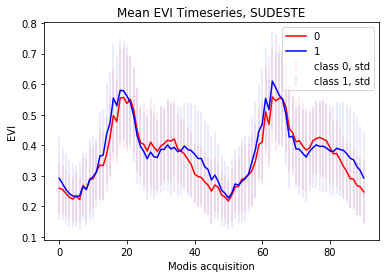

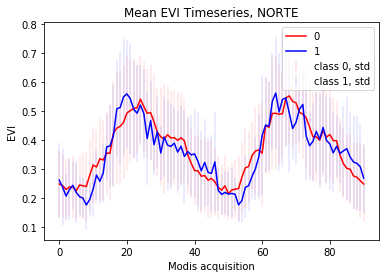

In [112]:
for regionname in regions:
    data_region_mean = grouped_ts_mean[regionname]
    data_region_std = grouped_ts_std[regionname]
    
    data_region_mean.columns = ['0', '1']
    data_region_std.columns = ['0', '1']

    plt.plot(data_region_mean.index, data_region_mean['0'], label = '0', color = 'red')
    plt.plot(data_region_mean.index, data_region_mean['1'], label = '1', color = 'blue')
    plt.errorbar(data_region_mean.index, data_region_mean['0'], data_region_std['0'], linestyle = 'None', alpha = 0.1, color = 'red', label = 'class 0, std')
    plt.errorbar(data_region_mean.index, data_region_mean['1'], data_region_std['1'], linestyle = 'None', alpha = 0.1, color = 'blue', label = 'class 1, std')
    plt.legend()
    plt.title('Mean EVI Timeseries, ' + regionname)
    plt.ylabel('EVI')
    plt.xlabel('Modis acquisition')
    plt.show()
    


Each region may have a different set of times that are best able to differentiate the two classes. In the south, southeast and center-west, the middle of the agricultural year (around modis acquisition 45) has higher EVI for irrigated points; in the northeast, the peak date is shifted for both the first and second peaks; in the north, the phenology of the two classes appear similar, but the first peak is a bit earlier for irrigated versus nonirrigated points. This analysis shows us that each region should be treated differently because the phenological differences between the two classes differ in space.

In [113]:
# repeat all the t-tests above, separated into regions

all_cols = sorted_mod_ts_cols + phenospectral_cols

for regionname in regions:
    for colname in all_cols:
        region_data = data[data.region == regionname]
        irrigated = region_data[region_data['class'] == 1][colname]
        nonirrigated = region_data[region_data['class'] == 0][colname]
        t_stat, p_value = stats.ttest_ind(irrigated, nonirrigated, nan_policy = 'omit', equal_var = False)

        t_test_results = t_test_results.append({'feature': colname, 'region': regionname, 
                                                't_stat': t_stat, 'p_value': p_value}, ignore_index = True)

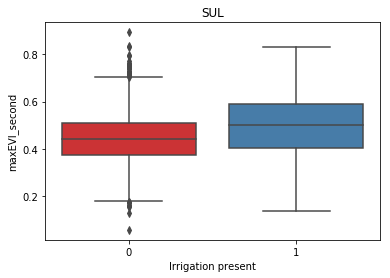

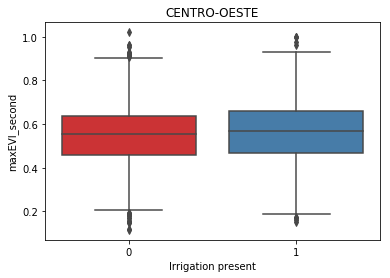

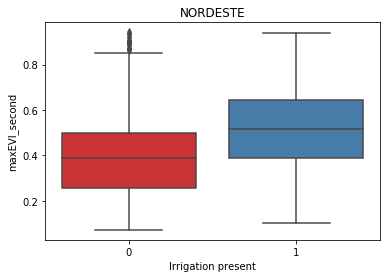

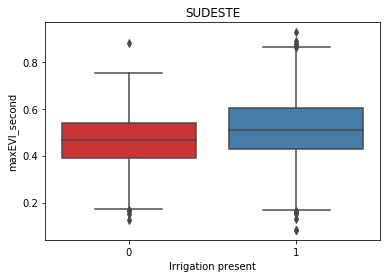

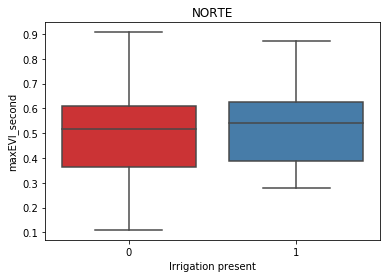

In [114]:
# if we split points into regions, will it be easier to see the difference between classes in the phenological predictors?

for regionname in regions:
    region_data = data[data['region'] == regionname]
    sns.boxplot(x = 'class', y = 'maxEVI_second', data = region_data, palette = 'Set1')
    plt.title(regionname)
    plt.xlabel('Irrigation present')
    plt.ylabel('maxEVI_second')
    plt.show()

Phenological parameters are better able to distinguish the different classes in the south and northeast, and is completely unable to distinguish the classes in the north. This indiciates that certain regions may have greater prediction accuracy than others, and that the set of most informative predictors might be different for each region.

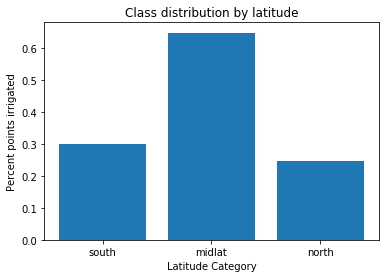

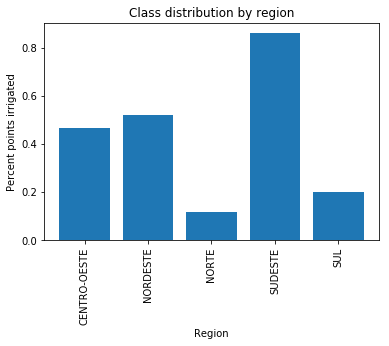

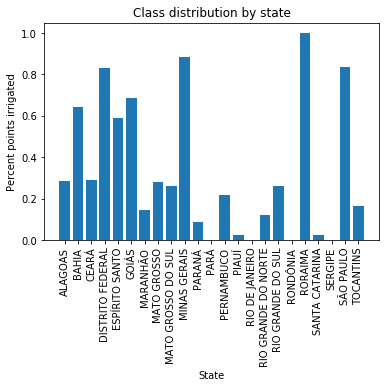

In [115]:
# how are the classes distributed across the latitudes and regions?

# create three latitude categories based on minimum and maximum latitude of the training points
min_lat = data.lat.min()
max_lat = data.lat.max()

data['latitude_cat'] = pd.cut(data.lat, bins = [-34, - 23, -12, 4], labels = ['south', 'midlat', 'north'])

# class distribution by latitude
class_dist_lat = data.groupby(['latitude_cat']).mean().loc[:, ['class_num']]
plt.bar(class_dist_lat.index, class_dist_lat['class_num'])
plt.xlabel('Latitude Category')
plt.ylabel('Percent points irrigated')
plt.title('Class distribution by latitude')
plt.show()

# class distribution by region
class_dist_lat = data.groupby(['region']).mean().loc[:, ['class_num']]
plt.bar(class_dist_lat.index, class_dist_lat['class_num'])
plt.xlabel('Region')
plt.ylabel('Percent points irrigated')
plt.xticks(rotation = 90)
plt.title('Class distribution by region')
plt.show()

# class distribution by state
class_dist_lat = data.groupby(['state']).mean().loc[:, ['class_num']]
plt.bar(class_dist_lat.index, class_dist_lat['class_num'])
plt.xlabel('State')
plt.ylabel('Percent points irrigated')
plt.xticks(rotation = 90)
plt.title('Class distribution by state')
plt.show()

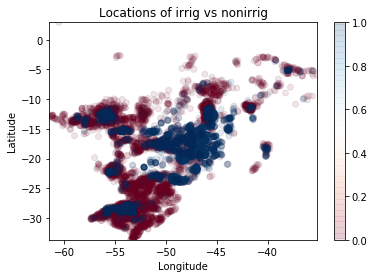

In [116]:
plt.scatter(x = 'lon', y = 'lat', c = 'class', data = data, alpha = 0.1, cmap = 'RdBu')
plt.title('Locations of irrig vs nonirrig')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar()
plt.xlim([data.lon.min(), data.lon.max()])
plt.ylim([data.lat.min(), data.lat.max()])
plt.show()


A much higher percentage of points are irrigated in the midlatitude region than the north or the south. This could be back the midlatitude region has more established agriculture, whose managers can afford to invest in expensive irrigation equipment. The north has by far the lowest irrigation rate, likely because the wet season tends to last longer in the north (closer to the Amazon), and irrigation is less of a necessity. The northern area also has less established agriculture and less expansive transportation network, making it difficult to build irrigation structures. The variation in irrigation frequency is largest at the state level; Roraima has almost 100% irrigation, while Para, Rio de Janeiro, and Sergipe have none. Since the physical location of the points impacts how the two classes can be distinguished, it will be important to keep in mind these regional imbalances in irrigation frequency.

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


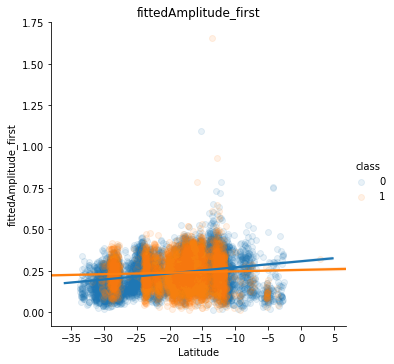

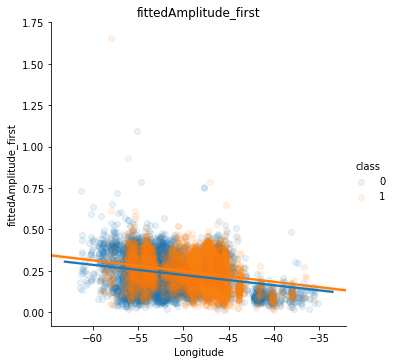

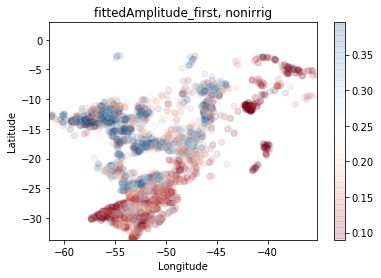

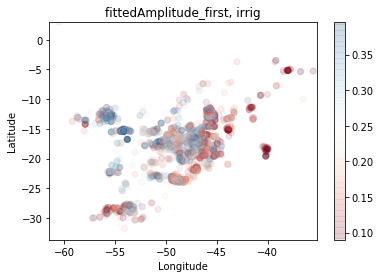

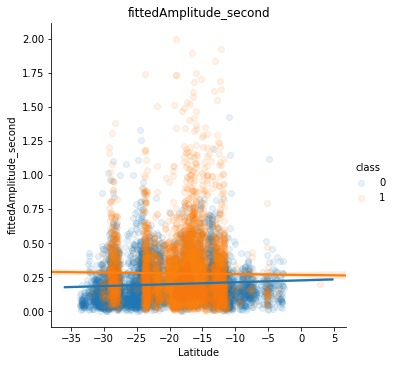

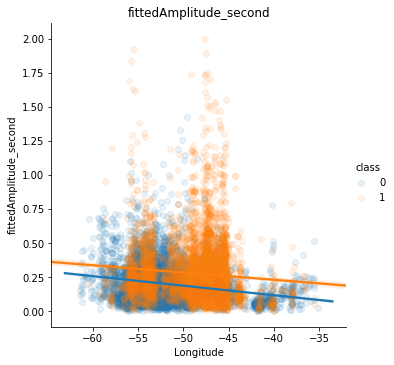

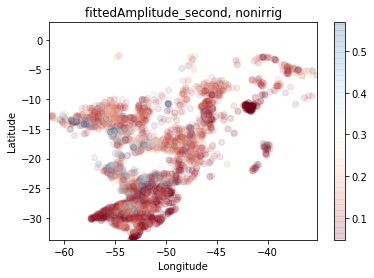

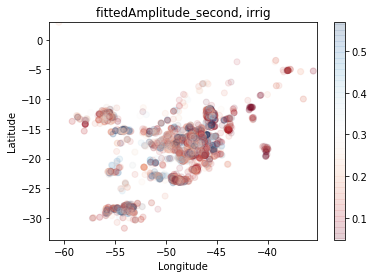

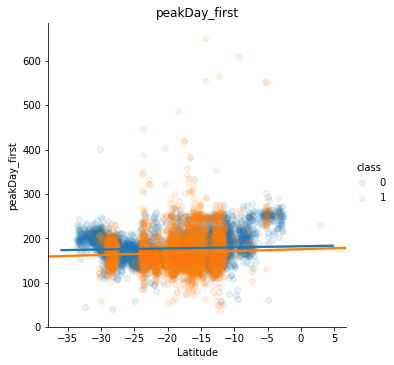

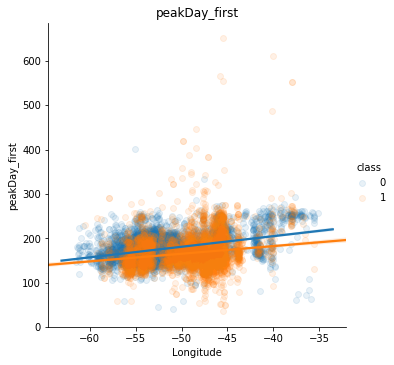

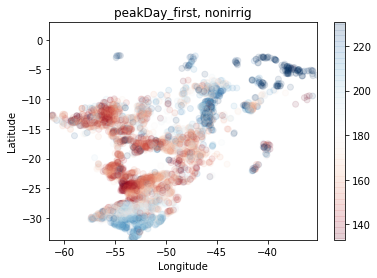

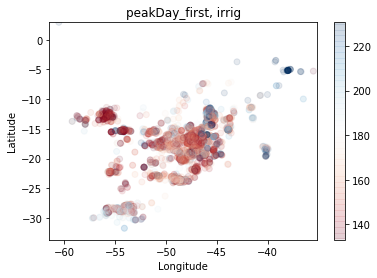

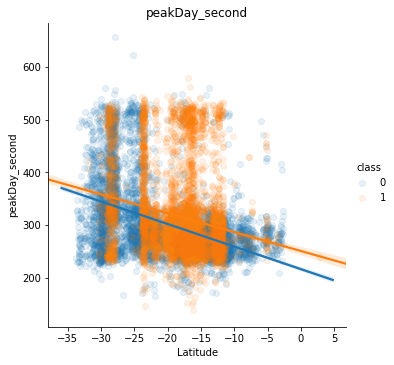

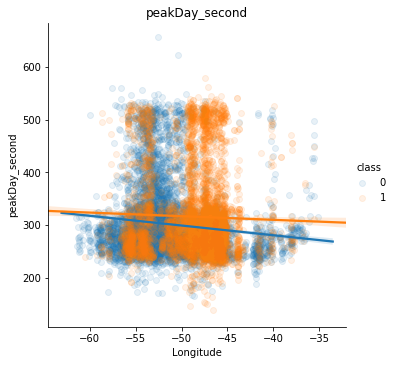

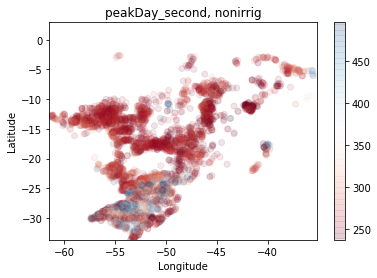

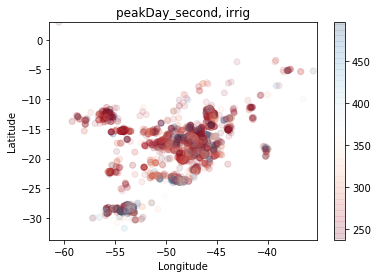

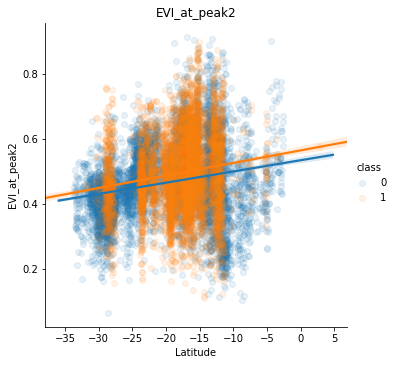

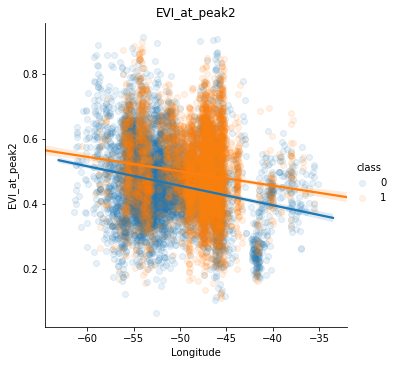

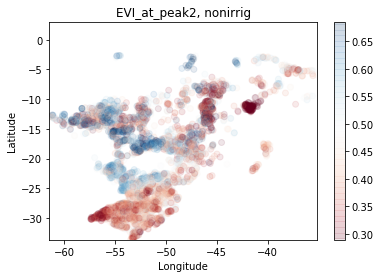

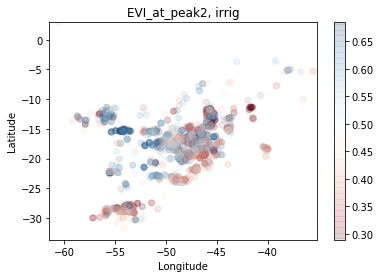

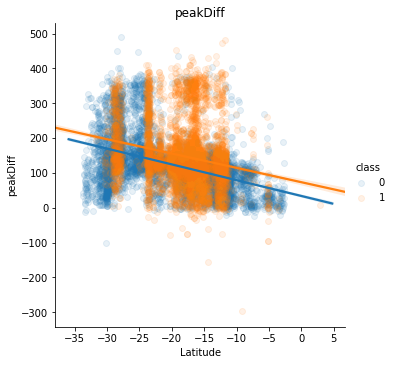

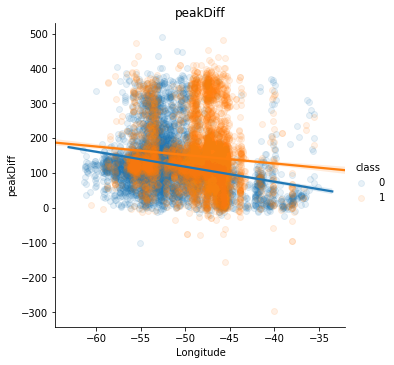

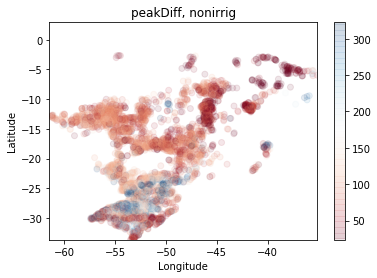

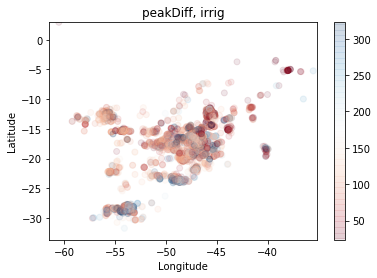

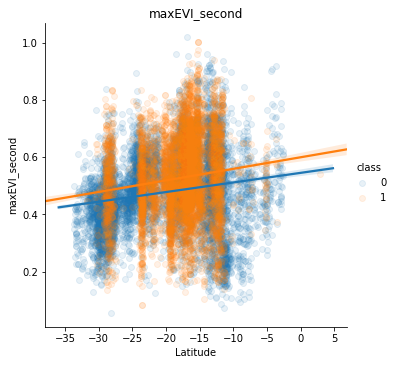

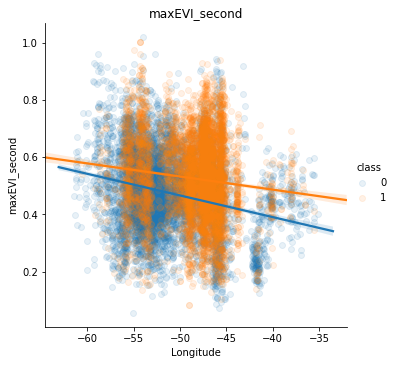

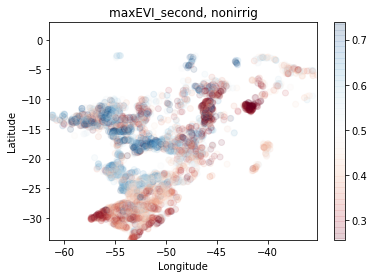

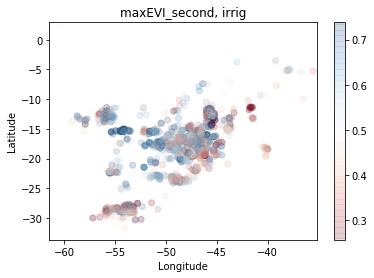

In [117]:
selected_phenospectral_cols = ['fittedAmplitude_first', 'fittedAmplitude_second', 'peakDay_first', 'peakDay_second', 
                               'EVI_at_peak2', 'peakDiff', 'maxEVI_second']
nonirrig = data[data['class_num'] == 0]
irrig = data[data['class_num'] == 1]
    
for colname in selected_phenospectral_cols:
    
    sns.lmplot(x = 'lat', y = colname, data = data, hue = 'class', scatter_kws = {'alpha': 0.1})
    plt.xlabel('Latitude')
    plt.ylabel(colname)
    plt.title(colname)
    plt.show()
    
    sns.lmplot(x = 'lon', y = colname, data = data, hue = 'class', scatter_kws = {'alpha': 0.1})
    plt.xlabel('Longitude')
    plt.ylabel(colname)
    plt.title(colname)
    plt.show()

    
    values = data[colname][~np.isnan(data[colname])]
    max_val = np.percentile(values, 95)# for plotting, get min and max for both irrigated and nonirrigated points
    min_val = np.percentile(values, 5) # take 5th and 95th percentiles to avoid outliers
    
    plt.scatter(x = 'lon', y = 'lat', c = colname, data = nonirrig, alpha = 0.1, vmin = min_val, vmax = max_val, cmap = 'RdBu')
    plt.title(colname + ', nonirrig')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.colorbar()
    plt.xlim([data.lon.min(), data.lon.max()])
    plt.ylim([data.lat.min(), data.lat.max()])
    plt.show()

    
    plt.scatter(x = 'lon', y = 'lat', c = colname, data = irrig, alpha = 0.1, vmin = min_val, vmax = max_val, cmap = 'RdBu')
    plt.title(colname + ', irrig')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.colorbar()
    plt.xlim([data.lon.min(), data.lon.max()])
    plt.ylim([data.lat.min(), data.lat.max()])
    plt.show()

Finally, we can look at the relationship between phenological parameters and latitude. Since the wet season progresses in a distinct spatial pattern, we may expect that phenological parameters for nonirrigated points will change in space more than irrigated points, as they're more vulnerable to climate.

The maps of phenology values for irrigated vs nonirrigated points does not show an obvious difference in spatial pattern for phenology, but does show that irrigated points are more concentrated in the center of the country compared to the edges, while nonirrigated points are spread across the agricultural area of the country. Perhaps the center will have better prediction accuracy because the training points are have a more even distribution between the two classes. Further, this indicates that lat and lon values, especially at the edges of the country, may have a lot of information about the class of the point.

There appear to be small changes in phenological values across lat and lon, and for certain phenological values the mean and slope are different between the two classes. However, part of the difference in behavior (especially across latitude) may be due to the fact that irrigated points don't extend as far in the north-south direction as nonirrigated points. Another confounder is that each latitude value will have a large range of phenological parameters to due variation in longitude, and vice versa. The spatial pattern must be described two dimensionally; it's very difficult to find a distinct spatial pattern along only one axis.

The takeaway is that we can't rule out possibility of phenology:location interactions in the classification, but it's likely that the location itself may carry some useful information for classification.

In [137]:
# look at statistical tests of which predictors and regions best separate the two classes. 
# do the best predictors differ among regions?

top_predictors = pd.DataFrame()
all_regions = regions.tolist() + ['Brazil']

for regionname in all_regions:
    region_results = t_test_results[t_test_results.region == regionname]
    region_results['abs_t_stat'] = region_results['t_stat'].abs()
    sorted_region_results = region_results.sort_values(by = ['abs_t_stat'], ascending = False).reset_index(drop = True)
    top_predictors[regionname] = sorted_region_results[0:10].feature

print(top_predictors)
    


                      SUL CENTRO-OESTE   NORDESTE                 SUDESTE  \
0  fittedAmplitude_second    mod_B0_44  mod_B0_60  fittedAmplitude_second   
1             EVI_at_min2     mod_B0_0  mod_B0_62                peakDiff   
2                mod_B0_0    mod_B0_46  mod_B0_42          peakDay_second   
3               mod_B0_46    mod_B0_91  mod_B0_61               mod_B0_87   
4               mod_B0_47    mod_B0_47  mod_B0_90               mod_B0_40   
5   fittedAmplitude_first     mod_B0_1  mod_B0_91               mod_B0_42   
6               mod_B0_66    mod_B0_90  mod_B0_88               mod_B0_89   
7               mod_B0_49    mod_B0_45  mod_B0_45               mod_B0_88   
8           maxEVI_second    mod_B0_89  mod_B0_41               mod_B0_86   
9            EVI_at_peak2    mod_B0_43  mod_B0_89               mod_B0_41   

         NORTE                  Brazil  
0     mod_B0_9  fittedAmplitude_second  
1    mod_B0_55               mod_B0_88  
2    mod_B0_12               

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


T-tests indicate that the irrig/nonirrig in the southern area of Brazil (SUDESTE and SUD) is best separated by fittedAmplitude_second, along with other phenological parameters. Phenological parameters are less able to separate the two classes in other regions. In the center-west and northeast regions, EVI in the middle of the agricultural year (modis acquisition 40 - 47) and the end of the agricultural year (modis acquisition 88 - 91) separate the two classes better than any other times of the year. Of the phenological parameters, the height and time of the second peak is best able to separate the two classes; 

[0, 46, 47, 66, 49]
[44, 0, 46, 91, 47, 1, 90, 45, 89, 43]
[60, 62, 42, 61, 90, 91, 88, 45, 41, 89]
[87, 40, 42, 89, 88, 86, 41]
[9, 55, 12, 58, 54, 10, 70, 57, 8]
[88, 25, 42, 58, 69, 24, 12, 87, 86]


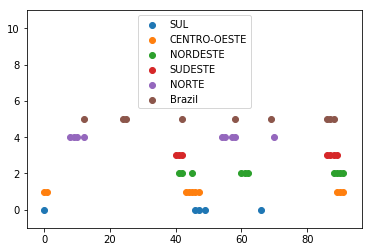

In [144]:
# plot the modis acquisition dates that best separate the two classes

for idx, regionname in enumerate(all_regions):
    top_EVI_times = [colname for colname in top_predictors[regionname] if colname.startswith('mod')]
    top_EVI_times = [int(colname.split('_')[2]) for colname in top_EVI_times]
    
    plt.scatter(top_EVI_times, [idx]*len(top_EVI_times), label = regionname)
    
    print(top_EVI_times)
plt.legend(loc='upper center')
plt.ylim(-1, 11)
plt.show()

From the 'timeseries' of the modis acquisitions that best separate the classes, we notice that there is a time between 40 and 50 that is consistently appropriate for separation, except for in the north; the north has a different seasonality, and the best modis acquisition times for separating the classes are 5 - 15 and 55 - 60. Additionally, the north and northeast also have a time from 55 - 65 that can separate the regions. The differences in the modis acquisition dates among the regions makes sense, because each region experiences different seasonalities.

Because the wet season is quite long, there's not as much phenological or EVI difference between irrigated and nonirrigated pixels (i.e. this kind of problem is much harder to do in Brazil than in the Sahara). However, EVI at certain times of the year and certain peak characteristics can help to differentiate the two classes. It's still unclear whether these differences ever become statistically significant. In 2014, there's also a distinct spatial imbalance in the presence of irrigation; this could give us an advantage in making predictions (because lat and lon would be useful predictors), but the advantage will decrease over time as irrigated area expands.